In [67]:
# Import necessary libraries for data handling, visualization, and suppressing warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Import scikit-learn modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [68]:
# Load the IMDb dataset from CSV file (update path if needed)
df = pd.read_csv("/Users/kajal.parmar/Documents/IMDB Dataset.csv")

In [69]:
# Display the first few rows to inspect the dataset structure
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [70]:
# Show dataset info: columns, dtypes, non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [71]:
# Display summary statistics for numerical columns
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [72]:
# Check the dataset dimensions (rows, columns)
df.shape

(50000, 2)

In [73]:
# Count the occurrences of each sentiment class
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [74]:
# Add a new column for review length (number of characters)
df['review_length'] = df['review'].apply(len)

In [75]:
# Describe the review length statistics
df['review_length'].describe()

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64

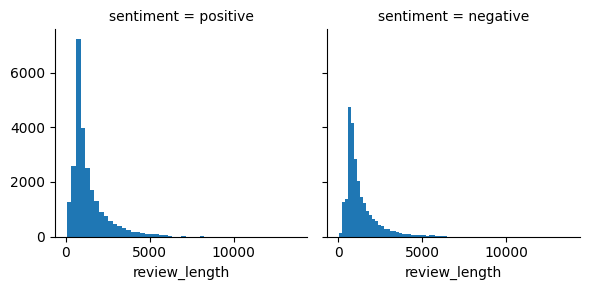

In [76]:
# Visualize review length distribution by sentiment using histograms
g=sns.FacetGrid(df, col='sentiment')
g.map(plt.hist, 'review_length', bins=50)
plt.show()

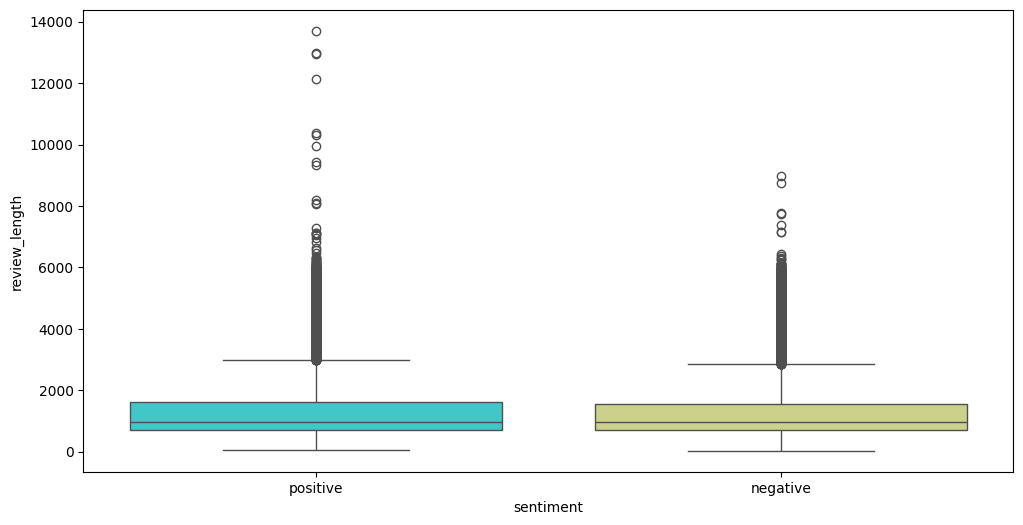

In [77]:
# Boxplot to compare review lengths by sentiment
plt.figure(figsize=(12,6))
sns.boxplot(x='sentiment', y='review_length', data=df, palette='rainbow')
plt.show()

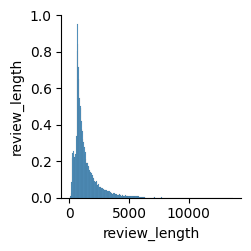

In [78]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df)


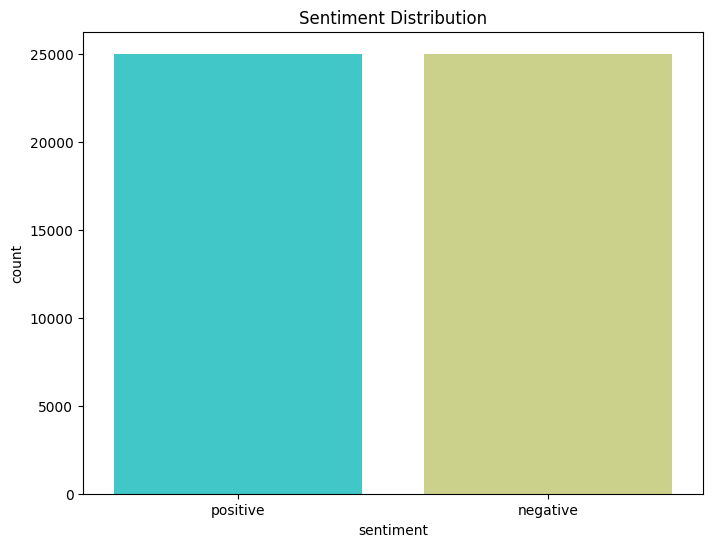

In [79]:
# Countplot to show sentiment distribution
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=df, palette='rainbow')
plt.title('Sentiment Distribution')
plt.show()

In [80]:
# Import additional libraries for text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [81]:
# Download NLTK stopwords and wordnet data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kajal.parmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kajal.parmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Create a set of English stopwords for text cleaning and initialize the WordNet lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [83]:
# Define a function to clean and preprocess text data
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

# Apply the cleaning function to the review column
df['clean_review'] = df['review'].apply(clean_text)

In [ ]:
# Map sentiment labels to binary values for classification
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})

# Define target variable
y = df['sentiment']

In [ ]:
# Import train_test_split for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
# Extract the cleaned reviews as features
X = df['clean_review']

In [ ]:
# Split the data into training and testing sets (duplicate cell)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Import TfidfVectorizer for converting text to TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
# Apply TF-IDF vectorization to convert text to numerical features
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Import LogisticRegression classifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Import evaluation metrics for assessing model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [92]:
# Create and train a Logistic Regression model using a pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', LogisticRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
print("Logistic Regression Pipeline Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Pipeline Accuracy: 0.8893
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
# Create and train a Naive Bayes model using a pipeline
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', MultinomialNB())
])

nb_pipeline.fit(X_train, y_train)
y_pred_nb = nb_pipeline.predict(X_test)
print("Naive Bayes Pipeline Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Pipeline Accuracy: 0.8546
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
# Create and train a Support Vector Machine model using a pipeline
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', LinearSVC())
])

svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)
print("SVM Pipeline Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Pipeline Accuracy: 0.8818
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



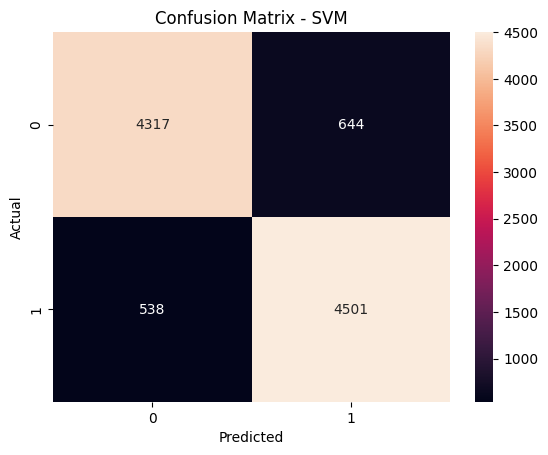

In [95]:
# Generate and visualize the confusion matrix for the SVM model
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()